Montecarlo
Tiramos 1000000 puntos y solo 6 sampleos cayeron en el area bajo la curva que buscamos estimar


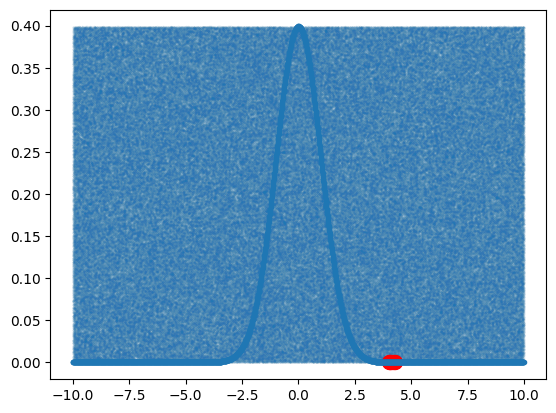

Importance Sampling


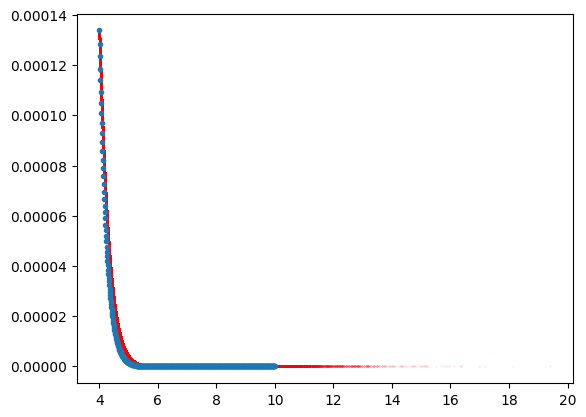

Valor real: 3.167124183311998e-05, Valor segun MC: 4.7873073648171926e-05, Valor segun IS:  3.1667915417495096e-05


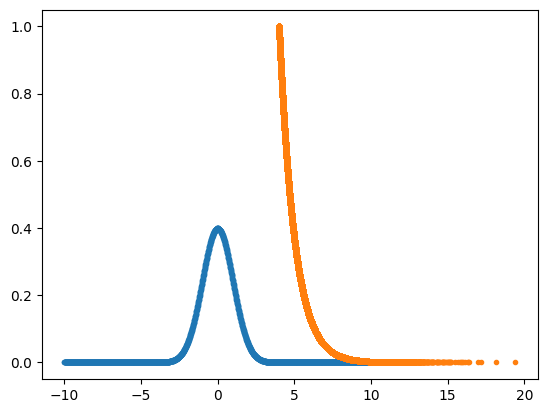

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon

####### Calcular la probabilidad de que la v.a. con distribución normal N(0,1) sea mayor a 4 #########

# Esa probabilidad es == al area bajo la curva de la distribucion normal, desde x>4.
# Para estimar ese area se puede usar el metodo de montecarlo

# 1)
# con Método de integración de Montecarlo
M = 1000000
f0 = 1 / np.sqrt(2 * np.pi)
x = 20 * np.random.rand(M) - 10
y = f0 * np.random.rand(M)

#Aca filtra los puntos que estan a la derecha de x>4 y despues que y<pdf_de_la_normal
x4_indices = np.where(x > 4)[0]
x4 = x[x4_indices]
y4 = y[x4_indices]
y4_indices = np.where(y4 < norm.pdf(x4, 0, 1))[0]
y4_less = y4[y4_indices]
x4_less = x4[y4_indices]

print("Montecarlo")
print(f"Tiramos {len(y)} puntos y solo {len(y4_less)} sampleos cayeron en el area bajo la curva que buscamos estimar")

plt.plot(np.arange(-10, 10, 0.01), norm.pdf(np.arange(-10, 10, 0.01), 0, 1), '.')
plt.scatter(x, y,s=0.1,alpha=0.1)
plt.scatter(x4_less, y4_less,s=100,alpha=1,c='red',label="Caen bajo curva")
#plt.legend() # es mas lento con esto
plt.show()

area_segun_MC = (len(y4_less) / len(y)) * f0 * 20

# 2)
# Utilizando Importance Sampling
x = np.random.exponential(scale=1, size=M) + 4
w = (1 / np.sqrt(2 * np.pi) * np.exp(-x**2 / 2)) / expon.pdf(x-3, 1) #w es: pdf_normal / pdf_exponencial. Deberia estar corrida x-4 la exponencial teoricamente pero por alguna razon esto hace que se corra 4, no entiendo pq.

print("Importance Sampling")
plt.plot(np.arange(4, 10, 0.01), norm.pdf(np.arange(4, 10, 0.01), 0, 1), '.')
plt.scatter(x, w,s=0.01,alpha=0.5,color="r")
plt.show()

area_segun_IS = np.mean(w)

# 3)
# Comparar los errores en la estimación
print(f"Valor real: {1 - norm.cdf(4, 0, 1)}, Valor segun MC: {area_segun_MC}, Valor segun IS:  {area_segun_IS}")

#nose para que hacia este grafico
plt.figure()
plt.plot(np.arange(-10, 10, 0.01), norm.pdf(np.arange(-10, 10, 0.01), 0, 1), '.')
plt.plot(x, expon.pdf(x - 3, 1), '.')
plt.show()
